## Preprocessing

In [1]:
!pip install keras-tuner

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 100
rare_apps = app_counts[(0 < app_counts) & (app_counts < threshold)].index
application_types_to_replace = rare_apps

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
rare_cls = class_counts[class_counts > 1]
rare_cls

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
threshold = 100
rare_apps = class_counts[(0 < class_counts) & (class_counts < threshold)].index
classifications_to_replace = rare_apps

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,669
C1700,287
C4000,194


In [11]:
# Look at the type for the df
application_df.dtypes


,0
APPLICATION_TYPE,object
AFFILIATION,object
CLASSIFICATION,object
USE_CASE,object
ORGANIZATION,object
STATUS,int64
INCOME_AMT,object
SPECIAL_CONSIDERATIONS,object
ASK_AMT,int64
IS_SUCCESSFUL,int64


In [12]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [13]:
# Define the bins for ASK_AMT
bins = [0, 10000, 50000, 100000, 500000, float('inf')]  # Define edges of the bins
labels = ['0-10k', '10k-50k', '50k-100k', '100k-500k', '500k+']  # Define labels for the bins

# Create a new column with the binned data
application_df['ASK_AMT_BUCKET'] = pd.cut(application_df['ASK_AMT'], bins=bins, labels=labels, right=False)

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,
                                 columns=['APPLICATION_TYPE', 'AFFILIATION', 'ASK_AMT_BUCKET','CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'],
                                 dtype=int)  # Specify dtype to int as it's mentioned in the original code
application_df = application_df.drop(columns=['SPECIAL_CONSIDERATIONS_N'])
application_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
application_df=application_df.drop(columns=['ASK_AMT','APPLICATION_TYPE_Other','AFFILIATION_Other','CLASSIFICATION_Other','USE_CASE_Other'])
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [16]:
# Split our preprocessed data into our features and target arrays
y=application_df['IS_SUCCESSFUL']
X=application_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

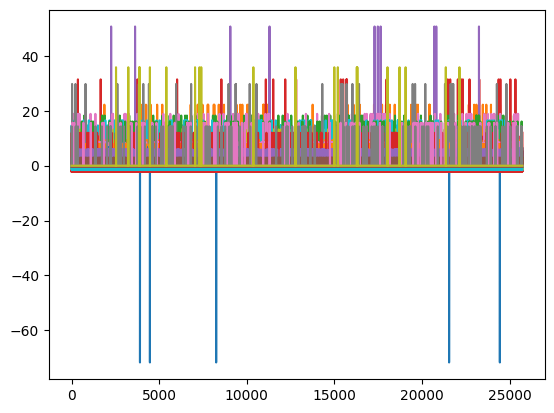

In [18]:
import matplotlib.pyplot as plt

plt.plot(X_train_scaled)
#plt.plot(y_train)
plt.show()

## Compile, Train and Evaluate the Model

In [19]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=32, activation="tanh", input_dim=len(X_train_scaled[0])))
nn_model.add(tf.keras.layers.Dense(units=64, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=128, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=128, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=64, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=20)
predicted = nn_model.predict(X_test_scaled)
predicted

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7028 - loss: 0.5901
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7239 - loss: 0.5617
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7197 - loss: 0.5608
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7308 - loss: 0.5519
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7319 - loss: 0.5484
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7359 - loss: 0.5441
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7353 - loss: 0.5443
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7293 - loss: 0.5477
Epoch 9/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7362 - loss: 0.5407
Epoch 10/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7375 - loss: 0.5428
Epoch 11/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7407 - loss: 0.5378
Epoch 12/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/ste

array([[0.6772702 ],
       [0.41047016],
       [0.73608   ],
       ...,
       [0.80430555],
       [0.28525475],
       [0.219196  ]], dtype=float32)

In [20]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 4ms/step - accuracy: 0.7272 - loss: 0.5529
Loss: 0.5529263615608215, Accuracy: 0.7272303104400635


In [21]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,597 (432.02 KB)

 Trainable params: 36,865 (144.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,732 (288.02 KB)

In [23]:
nn_model.save('AlphabetSoupCharity_Optimization.h5')

In [24]:
# Adjust model for optimization part 2
# Define the deep learning model
nn_adj_model = tf.keras.models.Sequential()
nn_adj_model.add(tf.keras.layers.Dense(units=32, activation="relu", input_dim=len(X_train_scaled[0]))) # input_dim set to the length of the data
nn_adj_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
nn_adj_model.add(tf.keras.layers.Dense(units=256, activation="relu"))
nn_adj_model.add(tf.keras.layers.Dense(units=256, activation="relu"))
nn_adj_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
nn_adj_model.add(tf.keras.layers.Dense(units=1, activation="relu"))


# Compile the Sequential model together and customize metrics
nn_adj_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=20)
predicted = nn_adj_model.predict(X_test_scaled)
predicted


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7405 - loss: 0.5320
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7451 - loss: 0.5295
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7338 - loss: 0.5400
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7419 - loss: 0.5295
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7407 - loss: 0.5328
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7386 - loss: 0.5340
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7443 - loss: 0.5274
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7417 - loss: 0.5338
Epoch 9/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7397 - loss: 0.5328
Epoch 10/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7475 - loss: 0.5239
Epoch 11/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7398 - loss: 0.5316
Epoch 12/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

array([[0.058319],
       [0.      ],
       [0.      ],
       ...,
       [0.      ],
       [0.      ],
       [0.      ]], dtype=float32)

In [25]:
model_loss, model_accuracy = nn_adj_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 3ms/step - accuracy: 0.4668 - loss: 7.5787
Loss: 7.578678607940674, Accuracy: 0.46682214736938477


##Auto Optimization for Comparison

In [ ]:
# Created method to create a Sequential model with hyperparameter options.
def create_model(hp):
    nn = tf.keras.models.Sequential()
    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid','linear'])

    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                              min_value=0,
                                              max_value=10,
                                              step=2), activation=activation, input_dim=len(X_train_scaled[0])))
    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        # Remove input_dim or set it dynamically based on the previous layer's output shape
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                  min_value=0,
                                                  max_value=10,
                                                  step=2),
                                      activation=activation)) # No input_dim here

    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn



In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

In [ ]:
# Evaluate the model using the test data
best_model=tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
best_model.save('AlphabetSoupCharity_Optimization.h5')

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

from sklearn.model_selection import GridSearchCV



In [ ]:
# Import necessary libraries
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the function to create the model, accepting hyperparameters as arguments
def create_model(units=32, activation='relu', batch_size=10):
    # Create the model
    nn_model = tf.keras.models.Sequential()
    # Add layers with specified hyperparameters
    nn_model.add(tf.keras.layers.Dense(units=units, activation=activation, input_dim=len(X_train_scaled[0])))
    nn_model.add(tf.keras.layers.Dense(units=units * 2, activation=activation))
    nn_model.add(tf.keras.layers.Dense(units=units * 4, activation=activation))
    nn_model.add(tf.keras.layers.Dense(units=units * 4, activation=activation))
    nn_model.add(tf.keras.layers.Dense(units=units * 2, activation=activation))
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return nn_model

# Wrap the model using KerasClassifier, passing the create_model function
model = KerasClassifier(model=create_model, epochs=50, verbose=0)

# Define the grid of hyperparameters to search
param_grid = {
    'model__units': [32, 64, 128], # Notice the "model__" prefix
    'model__activation': ['relu', 'leaky_relu'], # Notice the "model__" prefix
    'batch_size': [10, 20, 30]
}

# Use GridSearchCV to search for the best parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))